# 绘制专业 K 线图 (Candlestick Chart)

/Users/user/Documents/Fund_Auto_Bot/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


🕯️ 正在重新绘制 K 线图...


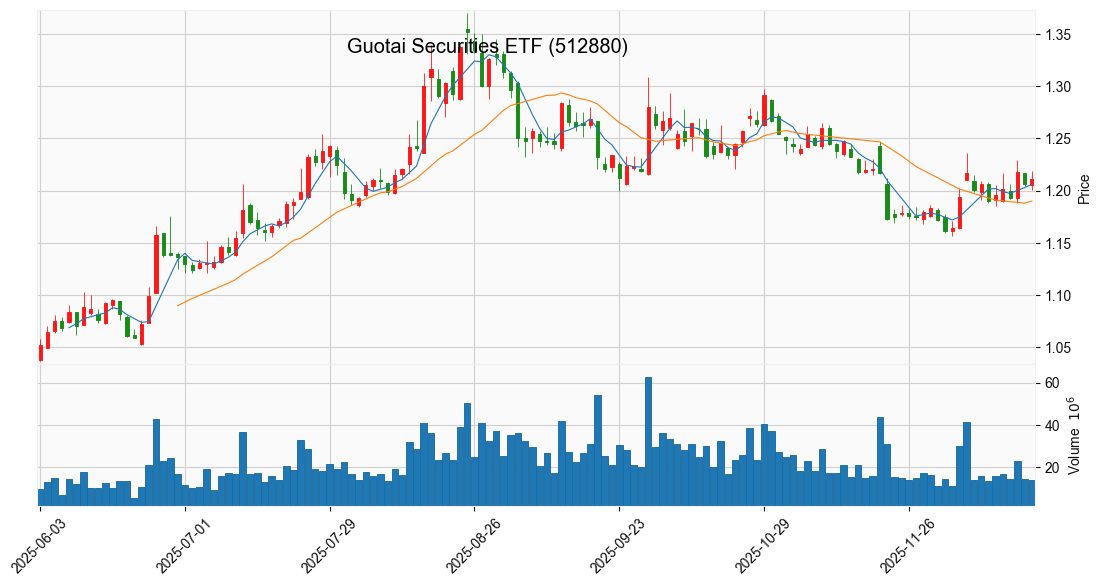

✅ 修复完成！现在的日期应该是 2025 年了！


In [1]:

import akshare as ak
import pandas as pd
import mplfinance as mpf
%matplotlib inline

# 1. 重新抓取 (确保数据是新鲜的)
print("🕯️ 正在重新绘制 K 线图...")
df = ak.fund_etf_hist_em(symbol="512880", period="daily", start_date="20250601", end_date="20251231")

# 2. 【关键修正】日期处理三部曲
# 第一步：把 '日期' 列变成时间对象 (不要动 index，动列！)
df['日期'] = pd.to_datetime(df['日期'])

# 第二步：把这一列“篡位”变成索引
df.set_index('日期', inplace=True)

# 第三步：改名 (mplfinance 只认英文)
df.rename(columns={
    '开盘': 'Open',
    '最高': 'High',
    '最低': 'Low',
    '收盘': 'Close',
    '成交量': 'Volume'
}, inplace=True)

# 确保全是数字
df = df[['Open', 'High', 'Low', 'Close', 'Volume']].astype(float)

# 3. 设置样式
my_style = mpf.make_mpf_style(
    base_mpf_style='yahoo', 
    rc={'font.family': 'Arial Unicode MS'}, 
    marketcolors=mpf.make_marketcolors(up='red', down='green', edge='inherit', wick='inherit')
)

# 4. 画图
mpf.plot(df, 
         type='candle', 
         mav=(5, 20), 
         volume=True, 
         style=my_style, 
         title='Guotai Securities ETF (512880)',
         figratio=(12, 6),
         datetime_format='%Y-%m-%d',
         tight_layout=True)

print("✅ 修复完成！现在的日期应该是 2025 年了！")